Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Reading the dataset from Google drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/melanoma/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/melanoma/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Loading training dataset here

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed = 123,
    validation_split = 0.2,
    image_size = (img_height,img_width),
    batch_size = batch_size,
    subset= 'training'
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Loading validation dataset here

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    image_size=(img_height,img_width),
    batch_size = batch_size,
    subset= 'validation'
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

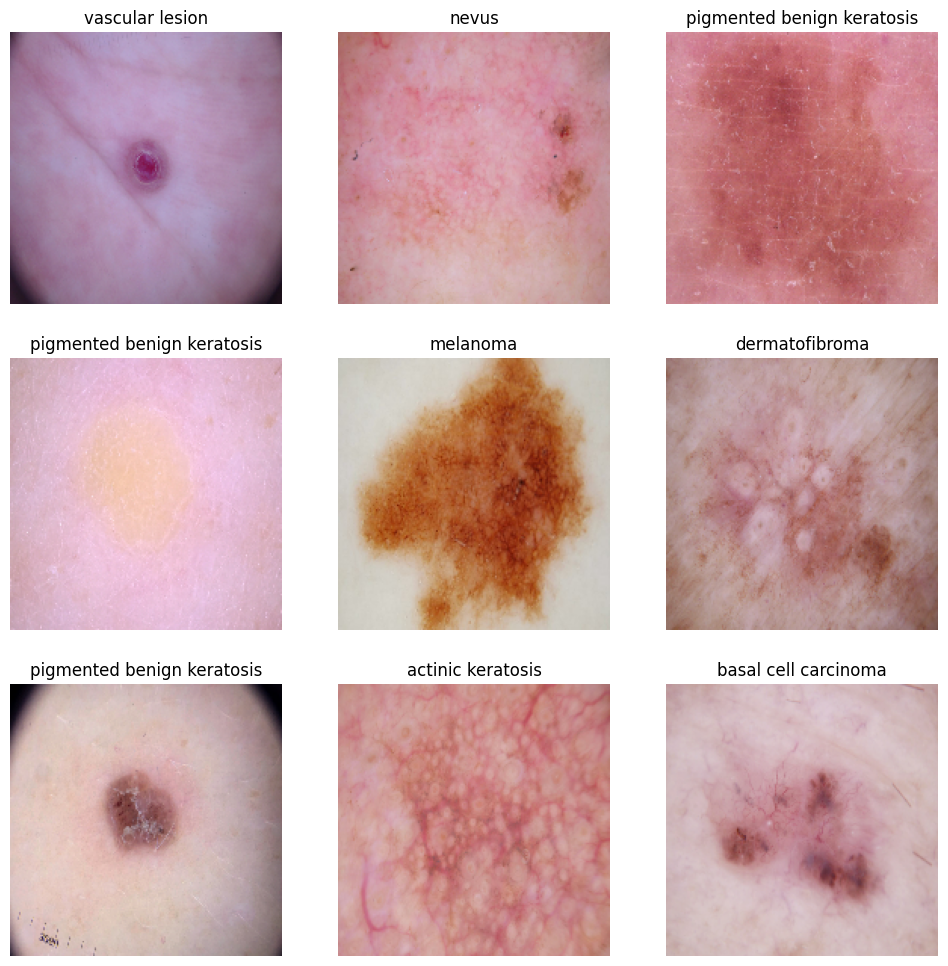

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.title(class_names[labels[i]])
    plt.axis("off")
    plt.imshow(images[i].numpy().astype("uint8"))

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
## Defining layers
num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.10),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [13]:
# Summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        3

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 215s 3s/step - loss: 1.9486 - accuracy: 0.2807 - val_loss: 1.7497 - val_accuracy: 0.3356
Epoch 2/20
56/56 [==============================] - 3s 51ms/step - loss: 1.6144 - accuracy: 0.4291 - val_loss: 1.4524 - val_accuracy: 0.5056
Epoch 3/20
56/56 [==============================] - 3s 49ms/step - loss: 1.4749 - accuracy: 0.4821 - val_loss: 1.4100 - val_accuracy: 0.5235
Epoch 4/20
56/56 [==============================] - 3s 49ms/step - loss: 1.3971 - accuracy: 0.5184 - val_loss: 1.4266 - val_accuracy: 0.5101
Epoch 5/20
56/56 [==============================] - 3s 49ms/step - loss: 1.3075 - accuracy: 0.5374 - val_loss: 1.3651 - val_accuracy: 0.5503
Epoch 6/20
56/56 [==============================] - 3s 51ms/step - loss: 1.2058 - accuracy: 0.5753 - val_loss: 1.4474 - val_accuracy: 0.5011
Epoch 7/20
56/56 [==============================] - 3s 50ms/step - loss: 1.1326 - accuracy: 0.6038 - val_loss: 1.4489 - val_accuracy: 0.5235
Epoch 8/20
56

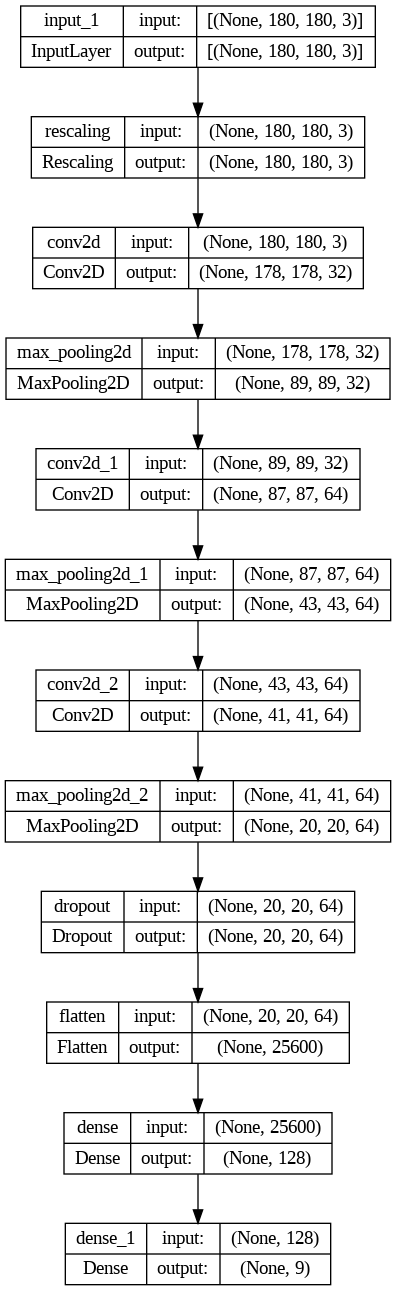

In [15]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Visualizing training results

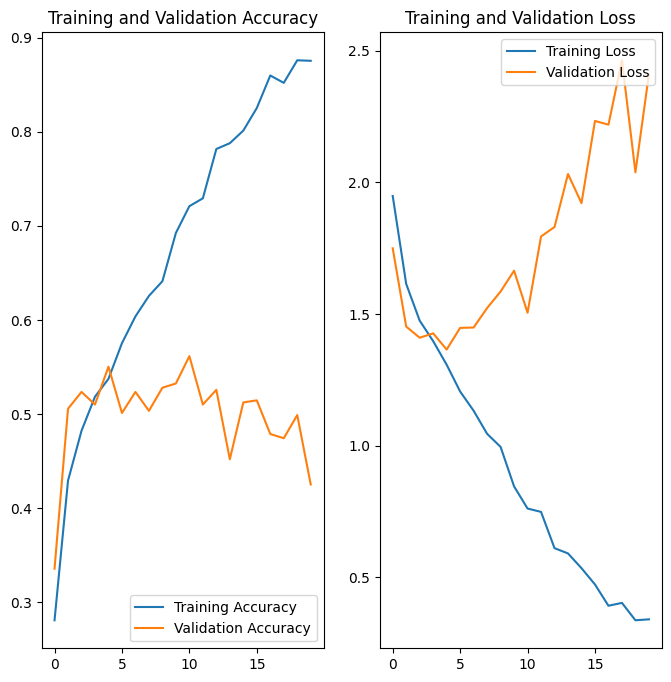

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
1. After around 6th epoch, the training accuracy keeps on increasing, however the validation accuracy is stangnant around 50%
2. There is a visible overfitting that is happening

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.RandomBrightness(0.2),
    layers.RandomContrast(0.3)
  ]
)

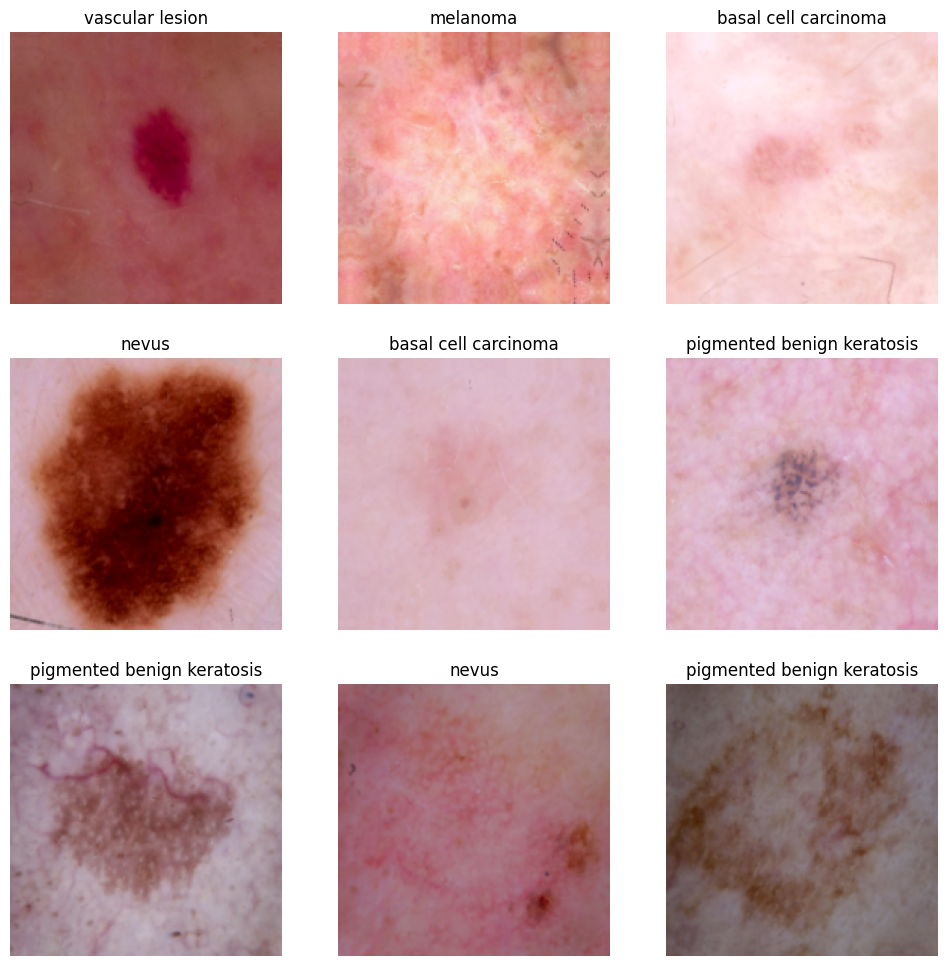

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [19]:
num_classes = 9

model_aug = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.10),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.10),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.10),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

### Compiling the model

In [20]:
model_aug.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [21]:
model_aug.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 89, 89, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                      

### Training the model

In [22]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20
history = model_aug.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 6s 66ms/step - loss: 2.1901 - accuracy: 0.2054 - val_loss: 2.0058 - val_accuracy: 0.2461
Epoch 2/20
56/56 [==============================] - 3s 61ms/step - loss: 1.7978 - accuracy: 0.3610 - val_loss: 1.6845 - val_accuracy: 0.4027
Epoch 3/20
56/56 [==============================] - 3s 59ms/step - loss: 1.6486 - accuracy: 0.4051 - val_loss: 1.6039 - val_accuracy: 0.4720
Epoch 4/20
56/56 [==============================] - 3s 58ms/step - loss: 1.5803 - accuracy: 0.4414 - val_loss: 1.5182 - val_accuracy: 0.4966
Epoch 5/20
56/56 [==============================] - 3s 57ms/step - loss: 1.5424 - accuracy: 0.4498 - val_loss: 1.5293 - val_accuracy: 0.4676
Epoch 6/20
56/56 [==============================] - 3s 62ms/step - loss: 1.5220 - accuracy: 0.4688 - val_loss: 1.5840 - val_accuracy: 0.4541
Epoch 7/20
56/56 [==============================] - 3s 58ms/step - loss: 1.5211 - accuracy: 0.4526 - val_loss: 1.4926 - val_accuracy: 0.4832
Epoch 8/20
56

### Visualizing the results

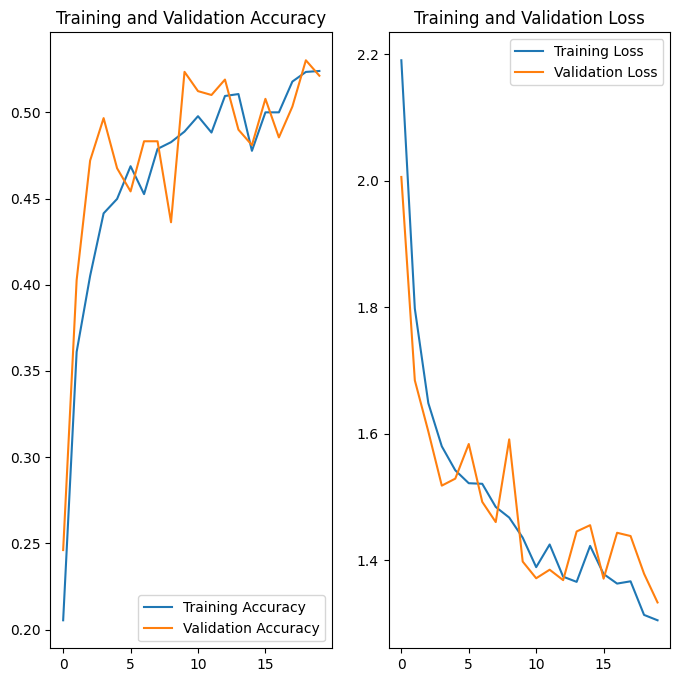

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
1. The model has fixed the overfitting issue post addition of data augmentation and multiple dropout layers
2. However the accuracy has dropped and this might be because of class imbalance in the training dataset

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

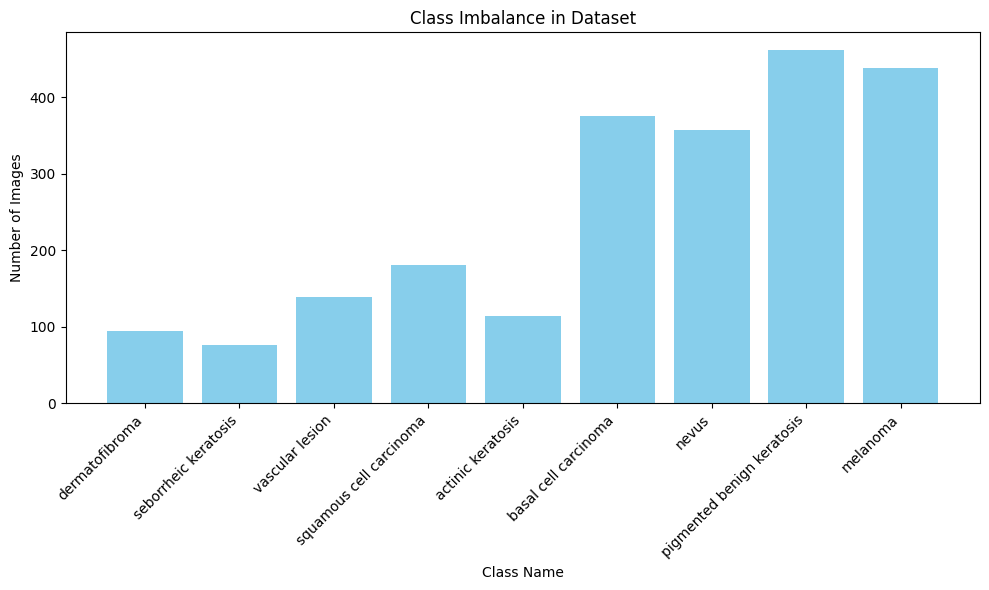

In [24]:
class_counts = {}

for class_folder in os.listdir(data_dir_train):
    class_path = os.path.join(data_dir_train, class_folder)

    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_counts[class_folder] = num_images

class_names = list(class_counts.keys())
class_counts_values = list(class_counts.values())
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts_values, color='skyblue')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Class Imbalance in Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?
1. Seborrheic keratosis has leasr number of samples
2. Melanoma, basal cell carcinoma, pigmented benign keratosis and nevus dominate the training dataset


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [26]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(data_dir_train) + '/' + str(i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/melanoma/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DF4F1597EB0>: 100%|██████████| 500/500 [00:21<00:00, 23.09 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/melanoma/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7DF4F15761A0>: 100%|██████████| 500/500 [00:47<00:00, 10.54 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/melanoma/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DF4F15C3AF0>: 100%|██████████| 500/500 [00:18<00:00, 27.03 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/melanoma/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DF4F156BC10>: 100%|██████████| 500/500 [00:18<00:00, 26.66 Samples/s]


Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/melanoma/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DF4F1576BC0>: 100%|██████████| 500/500 [00:18<00:00, 26.74 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/melanoma/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DF4F1668DF0>: 100%|██████████| 500/500 [00:17<00:00, 29.26 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/melanoma/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7DF513A34760>: 100%|██████████| 500/500 [01:18<00:00,  6.37 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/melanoma/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DF5A220BC40>: 100%|██████████| 500/500 [00:17<00:00, 28.15 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/melanoma/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DF513A14D00>: 100%|██████████| 500/500 [01:37<00:00,  5.11 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [27]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [35]:
import os
import shutil


parent_folder = '/content/gdrive/MyDrive/melanoma/Train'

for class_folder in os.listdir(parent_folder):
    class_path = os.path.join(parent_folder, class_folder)
    if os.path.isdir(class_path):
        output_folder = os.path.join(class_path, 'output')
        print(output_folder)
        if os.path.exists(output_folder) and os.path.isdir(output_folder):
            print(output_folder)
            for filename in os.listdir(output_folder):
                file_path = os.path.join(output_folder, filename)
                shutil.move(file_path, os.path.join(class_path, filename))
            os.rmdir(output_folder)


/content/gdrive/MyDrive/melanoma/Train/dermatofibroma/output
/content/gdrive/MyDrive/melanoma/Train/seborrheic keratosis/output
/content/gdrive/MyDrive/melanoma/Train/vascular lesion/output
/content/gdrive/MyDrive/melanoma/Train/squamous cell carcinoma/output
/content/gdrive/MyDrive/melanoma/Train/actinic keratosis/output
/content/gdrive/MyDrive/melanoma/Train/basal cell carcinoma/output
/content/gdrive/MyDrive/melanoma/Train/nevus/output
/content/gdrive/MyDrive/melanoma/Train/pigmented benign keratosis/output
/content/gdrive/MyDrive/melanoma/Train/melanoma/output


In [39]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

6739


### Lets see the distribution of augmented data after adding new images to the original training data.

### Todo: Train the model on the data created using Augmentor

### Todo: Create a training dataset

In [40]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed = 123,
    validation_split = 0.2,
    image_size = (img_height,img_width),
    batch_size = batch_size,
    subset= 'training'
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [41]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    image_size=(img_height,img_width),
    batch_size = batch_size,
    subset= 'validation'
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [42]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Todo:** Create your model (make sure to include normalization)

In [62]:
## Defining layers
num_classes = 9

model_balanced = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [63]:
model_balanced.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [64]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model_balanced.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 10s 40ms/step - loss: 1.7376 - accuracy: 0.3429 - val_loss: 2.1988 - val_accuracy: 0.1062
Epoch 2/30
169/169 [==============================] - 7s 39ms/step - loss: 1.5553 - accuracy: 0.4054 - val_loss: 2.1282 - val_accuracy: 0.2517
Epoch 3/30
169/169 [==============================] - 7s 39ms/step - loss: 1.4212 - accuracy: 0.4642 - val_loss: 2.2598 - val_accuracy: 0.1477
Epoch 4/30
169/169 [==============================] - 6s 37ms/step - loss: 1.3495 - accuracy: 0.4968 - val_loss: 2.6993 - val_accuracy: 0.2034
Epoch 5/30
169/169 [==============================] - 7s 39ms/step - loss: 1.2949 - accuracy: 0.5137 - val_loss: 3.3062 - val_accuracy: 0.2242
Epoch 6/30
169/169 [==============================] - 6s 37ms/step - loss: 1.2476 - accuracy: 0.5267 - val_loss: 2.3991 - val_accuracy: 0.2866
Epoch 7/30
169/169 [==============================] - 7s 39ms/step - loss: 1.1953 - accuracy: 0.5454 - val_loss: 1.7051 - val_accuracy: 0.418

#### **Todo:**  Visualize the model results

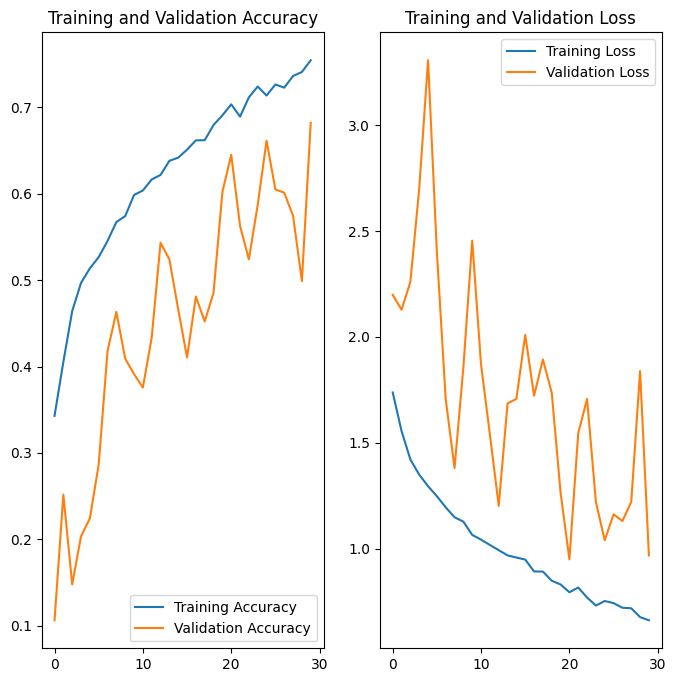

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
1. The model did perform better post fixing the class imbalance.
2. The gap between training accuracy and validation accuracy has also reduced, however there is visible fluctuation in validation accuracy
3. By hyper-parameter tuning we can further make the model better.